# Example Date of Non-disease Death Estimation with KaplanMeierEstimator

The Kaplan-Meier estimator uses survival information to draw for a date of death based on current age.

Current age may be non-zero for an initial population or zero for newborn agents.

## Drawing for Date of Non-disease Death for Newborn Agents

The input to the KaplanMeierEstimator is the cumulative number of deaths by bin/age.

The following data from Nigeria follow a hypothetical 100_000 person population giving the cumulative number of deaths by each age.

In [1]:
import numpy as np

cumulative = np.array(
    [
        8131,
        9396,
        10562,
        11636,
        12620,
        13506,
        14287,
        14958,
        15523,
        15997,  # year  0.. 9
        16400,
        16756,
        17083,
        17401,
        17725,
        18067,
        18437,
        18837,
        19268,
        19726,  # year 10..19
        20207,
        20705,
        21215,
        21732,
        22256,
        22785,
        23319,
        23860,
        24407,
        24961,  # year 20..29
        25522,
        26091,
        26668,
        27252,
        27845,
        28446,
        29059,
        29684,
        30324,
        30979,  # year 30..39
        31649,
        32334,
        33031,
        33737,
        34452,
        35176,
        35913,
        36666,
        37442,
        38247,  # year 40..49
        39085,
        39959,
        40869,
        41815,
        42795,
        43811,
        44866,
        45966,
        47118,
        48330,  # year 50..59
        49608,
        50958,
        52380,
        53876,
        55442,
        57080,
        58790,
        60574,
        62435,
        64372,  # year 60..69
        66380,
        68451,
        70569,
        72719,
        74880,
        77039,
        79179,
        81288,
        83353,
        85355,  # year 70..79
        87274,
        89085,
        90766,
        92299,
        93672,
        94884,
        95936,
        96837,
        97594,
        98216,  # year 80..89
        98713,
        99097,
        99383,
        99590,
        99735,
        99833,
        99897,
        99939,
        99965,
        99980,  # year 90..99
        100000,  # year 100+
    ],
    dtype=np.int32,
)

In [2]:
from laser.core.demographics import KaplanMeierEstimator

estimator = KaplanMeierEstimator(cumulative)
nagents = 100_000
dobs = np.zeros(nagents)  # dates of birth, newborns = 0
dods = estimator.predict_age_at_death(dobs, max_year=100)  # dates of death in days

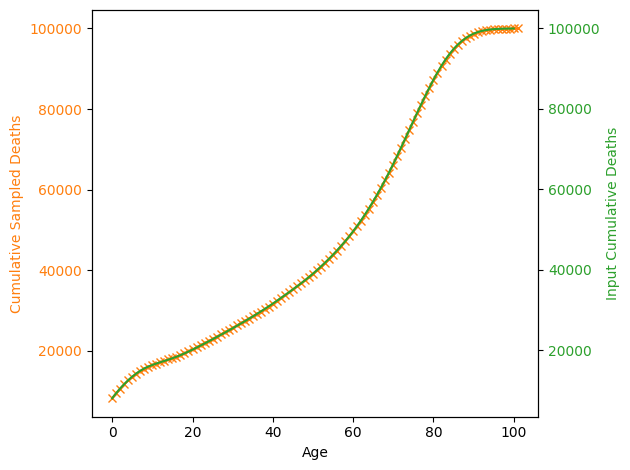

In [3]:
import matplotlib.pyplot as plt

histogram = np.zeros(cumulative.shape[0] + 1, np.int32)
yods = dods // 365  # years of death
for i in range(cumulative.shape[0] + 1):
    histogram[i] = np.sum(yods == i)

fig, ax1 = plt.subplots()

color = "tab:orange"
ax1.set_xlabel("Age")
ax1.set_ylabel("Cumulative Sampled Deaths", color=color)
ax1.plot(np.cumsum(histogram), color=color, marker="x")
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()
color = "tab:green"
ax2.set_ylabel("Input Cumulative Deaths", color=color)
ax2.plot(cumulative, color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.show()

## Drawing for Date of Non-disease Death for Newborn Agents

The input to the KaplanMeierEstimator is the cumulative number of deaths by bin/age.

The following data from Nigeria follow a hypothetical 50_000 person population giving the cumulative number of deaths by each age.

In [4]:
nagents = 100_000 - cumulative[49]  # how many 50+ years old do we expect?
dobs = np.full(nagents, 365 * 50)  # dates of birth, 50 years old
dobs += np.random.randint(0, 365, nagents)  # add random days
dods = estimator.predict_age_at_death(dobs, max_year=100)  # dates of death in days

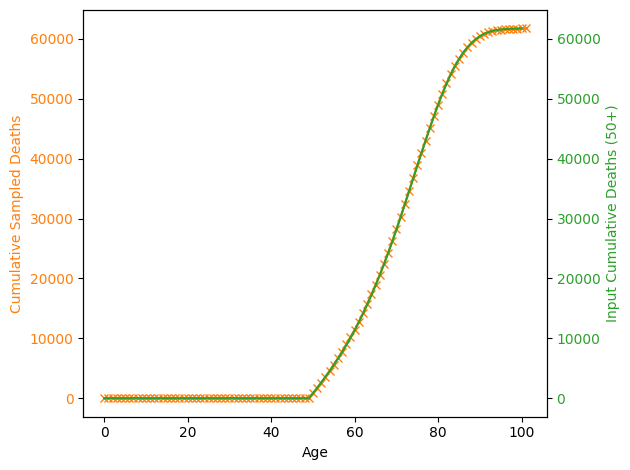

In [5]:
histogram = np.zeros(cumulative.shape[0] + 1, np.int32)
yods = dods // 365  # years of death
for i in range(cumulative.shape[0] + 1):
    histogram[i] = np.sum(yods == i)

fig, ax1 = plt.subplots()

color = "tab:orange"
ax1.set_xlabel("Age")
ax1.set_ylabel("Cumulative Sampled Deaths", color=color)
ax1.plot(np.cumsum(histogram), color=color, marker="x")
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()
color = "tab:green"
ax2.set_ylabel("Input Cumulative Deaths (50+)", color=color)
subsequent = np.maximum(cumulative - cumulative[49], 0)
ax2.plot(subsequent, color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.show()